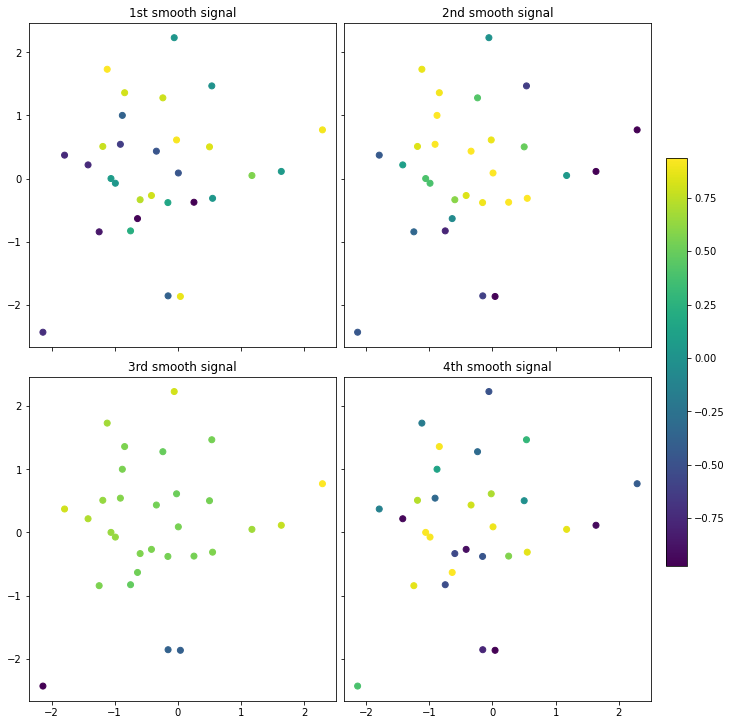

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from pygsp import graphs, plotting
from scipy.spatial.distance import pdist, squareform
import networkx as nx

import src.gl_models as gl

n = 30
np.random.seed(2)
x = np.random.randn(n,1)
y = np.random.randn(n,1)

f1 = lambda x, y: np.sin((2-x-y)**2)
f2 = lambda x, y: np.cos((x+y)**2)
f3 = lambda x, y: (x-.5)**2 + (y-.5)**3 + x - y
f4 = lambda x, y: np.sin(3*((x-.5)**2+(y-.5)**2))

X = np.hstack((f1(x,y),f2(x,y),f3(x,y),f4(x,y)))

fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True, constrained_layout=True)
img = ax[0, 0].scatter(x,y, c = X[:,0]); ax[0, 0].set_title('1st smooth signal'); ax[0, 0].set_aspect(1)
ax[0, 1].scatter(x,y, c = X[:,1]); ax[0, 1].set_title('2nd smooth signal'); ax[0, 1].set_aspect(1) 
ax[1, 0].scatter(x,y, c = X[:,2]); ax[1, 0].set_title('3rd smooth signal'); ax[1, 0].set_aspect(1)
ax[1, 1].scatter(x,y, c = X[:,3]); ax[1, 1].set_title('4th smooth signal'); ax[1, 1].set_aspect(1)
fig.colorbar(img, ax=ax[:, 1], shrink = 0.6)

# iters:  2969  Rel primal:  9.492030894764725e-06  Rel dual:  9.322022876722123e-07  OBJ:  [[40.49568539]] 

Time needed is  0.3700740337371826  seconds

False


<Figure size 432x288 with 0 Axes>

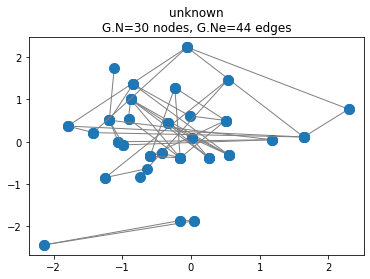

In [8]:
z = pdist(X, 'euclidean') # distance matrix condensed form

#card_E = 2*(n-1)
k = 2
Z = squareform(z) # turns the condensed form into a 4 by 4 distance matrix

theta = gl.estimate_theta(Z,k)

a = 1
b = 1
#theta = 1
params = {'maxit':20000}
W = gl.gsp_learn_graph_log_degrees(theta*Z,a,b,params)
W[W<1e-5] = 0
W = W/np.max(W[W>0])

plt.figure()
G = graphs.Graph(W)
G.set_coordinates(np.hstack((x,y)))
G.plot()
print(G.is_connected())
